In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
# import statsmodels.api as sm
# from statsmodels.imputation import mice
# from statsmodels.imputation.bayes_mi import BayesGaussMI, MI

In [4]:
data = pd.read_csv("../data/bank-additional-full.csv",  delimiter=';')

In [5]:
data.drop(columns=['default'],inplace=True)

In [6]:
data = data.replace("unknown", np.nan)

In [7]:
data = data.dropna()

In [8]:
numCols = data.select_dtypes("number").columns
catCols = data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
numCols, catCols

(['age',
  'cons.price.idx',
  'campaign',
  'pdays',
  'emp.var.rate',
  'previous',
  'nr.employed',
  'duration',
  'cons.conf.idx',
  'euribor3m'],
 ['poutcome',
  'education',
  'day_of_week',
  'marital',
  'housing',
  'month',
  'loan',
  'job',
  'contact',
  'y'])

In [9]:
catCols.remove('y')

In [10]:
for cat in catCols:
    y = pd.get_dummies(data[cat], prefix=cat)
    data.drop(columns=[cat],inplace=True)
    data = data.join(y)

In [11]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'marital_divorced',
       'marital_married', 'marital_single', 'housing_no', 'housing_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'loan_no', 'loan_yes', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unem

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'y'], data['y'], test_size=0.33, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25624, 55), (12621, 55), (25624,), (12621,))

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_pred_train = clf.predict(X_train)

In [17]:
accuracy_score(y_train, y_pred_train)

1.0

In [18]:
accuracy_score(y_test, y_pred)

0.887726804532129

In [19]:
r = permutation_importance(clf, X_test, y_test,
                           n_repeats=1,
                           random_state=0)

r.importances_mean.argsort()

array([51,  2,  4, 28, 40, 49, 16, 44, 45, 21, 13, 20, 32, 48, 35, 17, 39,
       52, 26, 11, 15, 18, 30, 36, 31, 27, 46, 14,  5, 10, 34, 41, 29, 50,
       25, 47, 43, 53, 12, 33, 42, 22, 54, 24, 23, 19,  0,  6,  7, 37, 38,
        3,  8,  9,  1], dtype=int64)

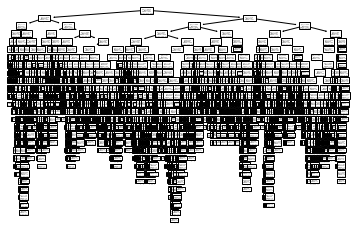

In [20]:
tree.plot_tree(clf); 